# Introduction

Theo Tổ chức Y tế Thế giới (WHO), đột quỵ là nguyên nhân gây tử vong đứng thứ hai trên toàn cầu. Đây là một bệnh có tỷ lệ mắc bệnh, tàn tật và tử vong cao, trong đó các nạn nhân có thể đột ngột trải qua tình trạng liệt, suy giảm khả năng nói hoặc mất thị lực do sự gián đoạn dòng máu (thiếu máu cục bộ) gây ra bởi huyết khối và thuyên tắc.

Mặc dù cơ chế bệnh sinh của đột quỵ chưa được làm sáng tỏ hoàn toàn, nhưng nó được biết là có mối liên hệ chặt chẽ với các chỉ số trao đổi chất bất thường, trong đó 90% có thể được kiểm soát. Đây là lý do tại sao việc dự đoán đột quỵ có thể mang tính quyết định, giúp các cá nhân được điều trị sớm hơn và tránh các hậu quả tàn tật hoặc tử vong.

# Objective

Mục đích của nghiên cứu này là áp dụng các kỹ thuật Khoa học Dữ liệu và Máy học để xây dựng một mô hình chính xác dựa trên bộ dữ liệu về đột quỵ nhằm dự đoán kết quả đột quỵ từ việc biết các đặc điểm cá nhân của một người. Đồng thời, nghiên cứu cung cấp thông tin hữu ích về khả năng một người có nguy cơ bị đột quỵ, hỗ trợ nhân viên y tế đưa ra các hành động cần thiết nhằm giảm thiểu rủi ro hiện có và tránh những hậu quả nghiêm trọng.

Chúng ta có thể thấy rằng bộ dữ liệu chứa thông tin về 43400 bệnh nhân, bao gồm các đặc trưng sau:

id: Mã định danh của từng bệnh nhân.

gender: Giới tính của bệnh nhân.

age: Tuổi của bệnh nhân.

hypertension: Cho biết liệu bệnh nhân có bị cao huyết áp hay không.

heart_disease: Cho biết liệu bệnh nhân có mắc bệnh tim mạch hay không.

ever_married: Cho biết liệu bệnh nhân đã từng kết hôn hay chưa.

work_type: Loại công việc của bệnh nhân.

residence_type: Loại nơi cư trú của bệnh nhân (thành thị hoặc nông thôn).

avg_glucose_level: Mức đường huyết trung bình của bệnh nhân.

bmi: Chỉ số khối cơ thể (Body Mass Index) của bệnh nhân.

smoking_status: Tình trạng hút thuốc của bệnh nhân.

stroke: Kết quả đột quỵ của bệnh nhân trong bộ dữ liệu (có hay không bị đột quỵ).

# 2. Data Understanding

Nguồn Data:
https://www.kaggle.com/datasets/shashwatwork/cerebral-stroke-predictionimbalaced-dataset


In [234]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

#Reading Data (EDA)

In [312]:
ds= pd.read_csv("/content/DotQuy.csv")
ds

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


##Age


/tmp/ipython-input-2287566148.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['age'], color='magenta', kde=True)


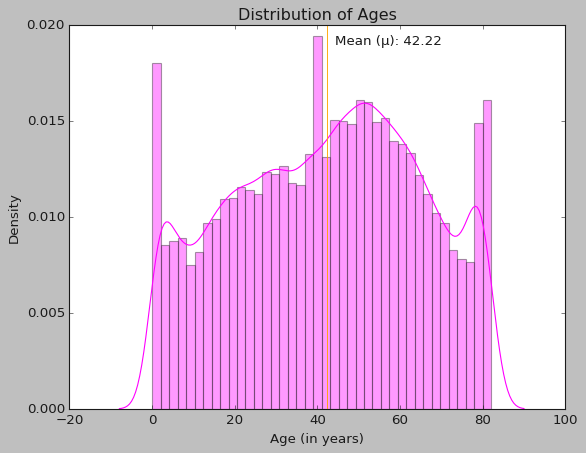

In [ ]:
plt.style.use("classic")
sns.distplot(ds['age'], color='magenta', kde=True)
plt.axvline(ds['age'].mean(), color='orange', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(ds['age'].mean()*1.05, max_ylim*0.95, 'Mean (μ): {:.2f}'.format(ds['age'].mean()))
plt.xlabel("Age (in years)")
plt.title("Distribution of Ages")
plt.show()


##Gender

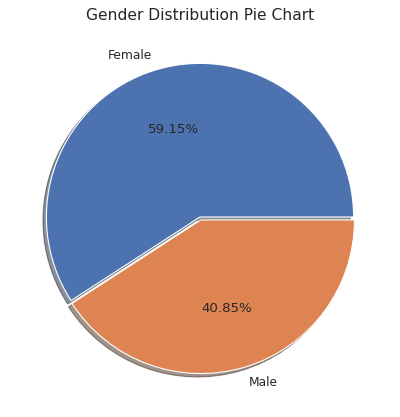

In [ ]:
sns.set(style="whitegrid")

labels = ds['gender'].value_counts().index.tolist()[:2]
values = ds['gender'].value_counts().tolist()[:2]

plt.pie(values, labels=labels, autopct="%1.2f%%", explode=[0, 0.02], shadow=True)
plt.title("Gender Distribution Pie Chart", fontsize=14)
plt.show()

##Hypertension

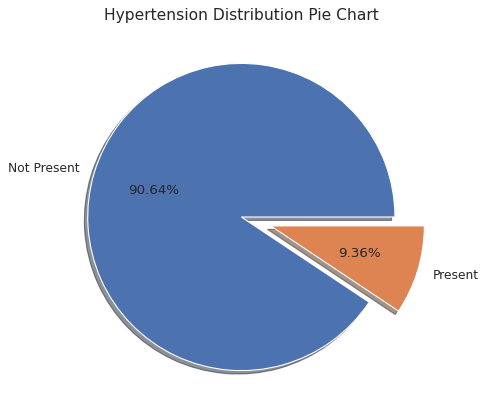

In [ ]:
sns.set(style="whitegrid")

labels = ["Not Present", "Present"]
values = ds['hypertension'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
plt.title("Hypertension Distribution Pie Chart", fontsize=14)
plt.show()

##Presence of Heart Disease

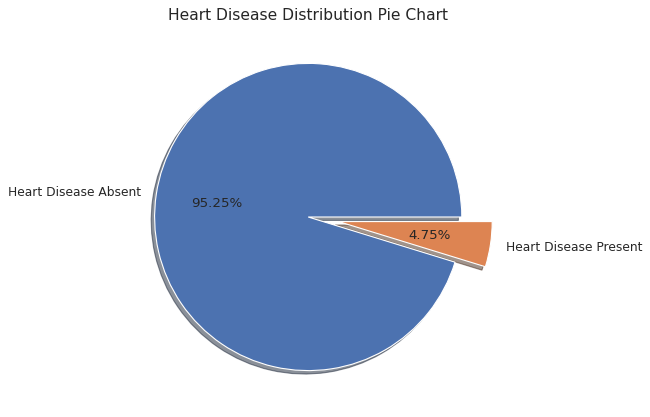

In [ ]:
sns.set(style="whitegrid")

labels = ["Heart Disease Absent", "Heart Disease Present"]
values = ds['heart_disease'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.2])
plt.title("Heart Disease Distribution Pie Chart", fontsize=14)
plt.show()

##Ever Married

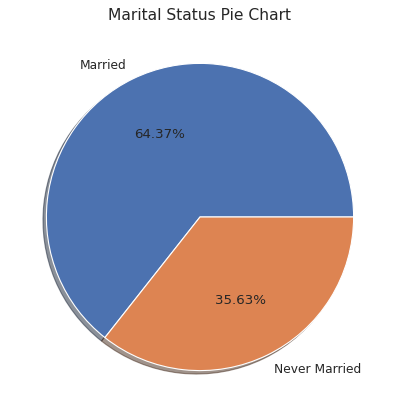

In [ ]:
sns.set(style="whitegrid")

labels = ["Married", "Never Married"]
values = ds['ever_married'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Marital Status Pie Chart", fontsize=14)
plt.show()


##Work Type

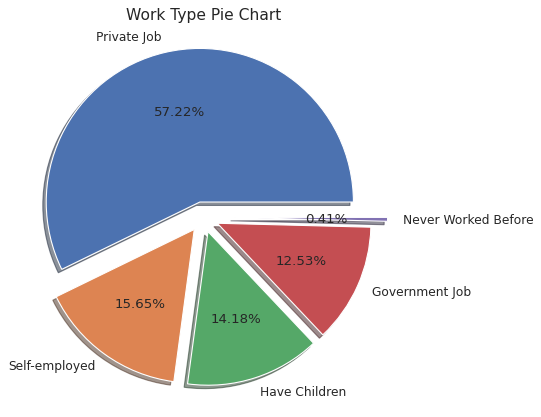

In [ ]:
sns.set(style="whitegrid")

labels = ["Private Job", "Self-employed", "Have Children", "Government Job", "Never Worked Before"]
values = ds['work_type'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0.1, 0.1, 0.1, 0.1, 0.2])
plt.title("Work Type Pie Chart", fontsize=14)
plt.show()


##Residence Type

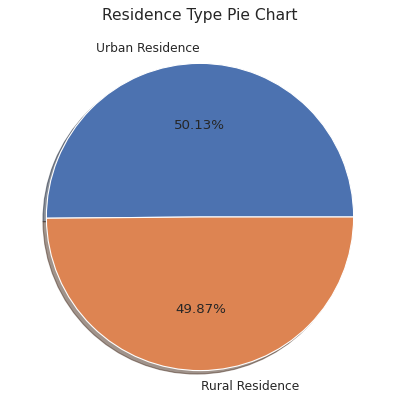

In [ ]:
sns.set(style="whitegrid")

labels = ["Urban Residence", "Rural Residence"]
values = ds['Residence_type'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Residence Type Pie Chart", fontsize=14)
plt.show()


##Average Glucose level of the Patient

/tmp/ipython-input-103290774.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['avg_glucose_level'], color='darkblue', kde=True)


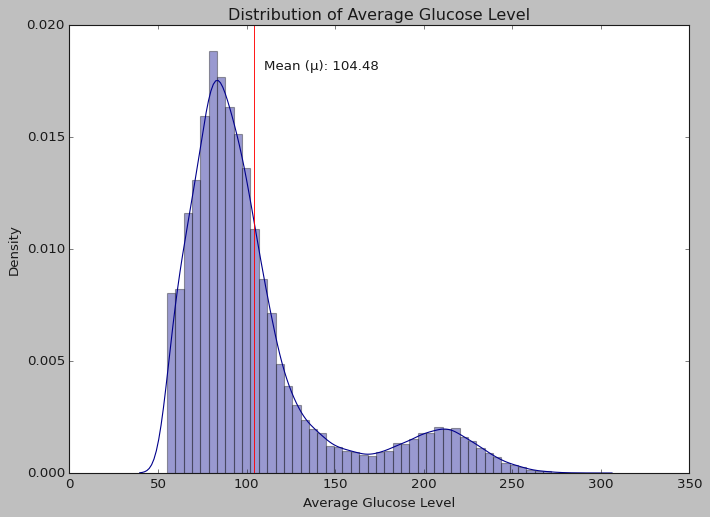

In [ ]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(ds['avg_glucose_level'], color='darkblue', kde=True)
plt.axvline(ds['avg_glucose_level'].mean(), color='red', linestyle='-', linewidth=0.8)
min_ylim, max_ylim = plt.ylim()
plt.text(ds['avg_glucose_level'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(ds['avg_glucose_level'].mean()))
plt.xlabel("Average Glucose Level")
plt.title(f"Distribution of Average Glucose Level")
plt.show()

##Body Mass Index of Patient (BMI)

/tmp/ipython-input-3823771270.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ds['bmi'], color='darkred', kde=True)


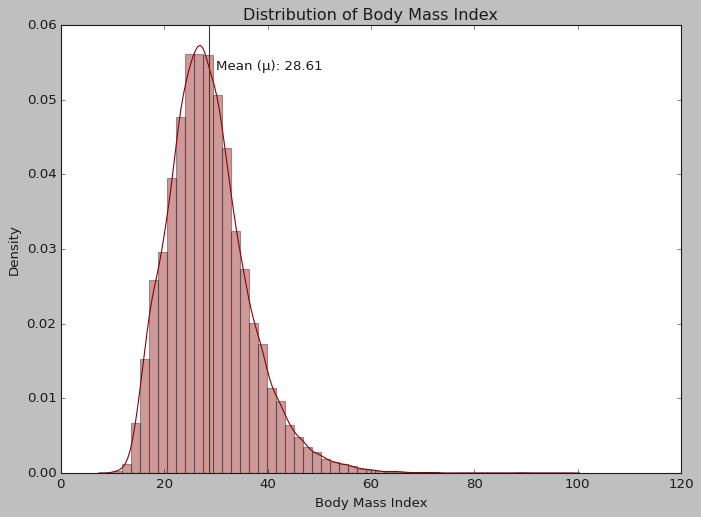

In [ ]:
plt.style.use("classic")
plt.figure(figsize=(10, 7))
sns.distplot(ds['bmi'], color='darkred', kde=True)
plt.axvline(ds['bmi'].mean(), color='darkgreen', linestyle='-', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(ds['bmi'].mean()*1.05, max_ylim*0.9, 'Mean (μ): {:.2f}'.format(ds['bmi'].mean()))
plt.xlabel("Body Mass Index")
plt.title(f"Distribution of Body Mass Index")
plt.show()

##Smoking Status

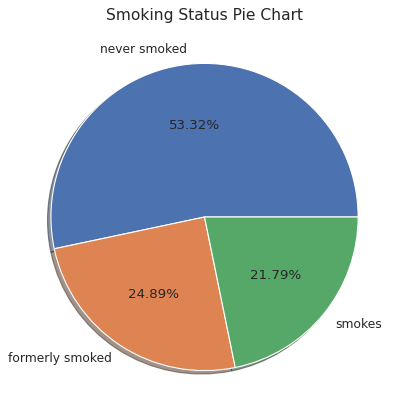

In [ ]:
sns.set(style="whitegrid")

labels = ["never smoked", "formerly smoked", "smokes"]
values = ds['smoking_status'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Smoking Status Pie Chart", fontsize=14)
plt.show()


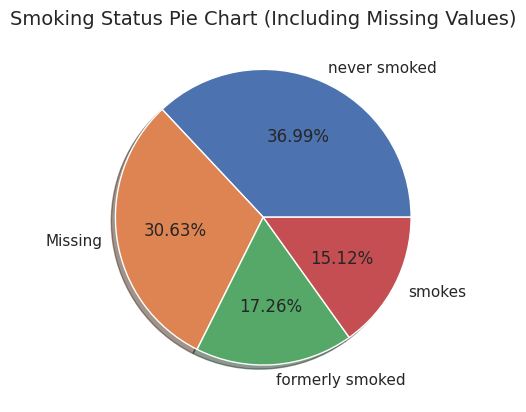

In [ ]:
sns.set(style="whitegrid")

smoking_counts = ds['smoking_status'].value_counts(dropna=False)

labels = smoking_counts.index.tolist()
values = smoking_counts.values.tolist()

labels = ["Missing" if str(l) == "nan" else l for l in labels]

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True)
plt.title("Smoking Status Pie Chart (Including Missing Values)", fontsize=14)
plt.show()

##Stroke (Target Variable)

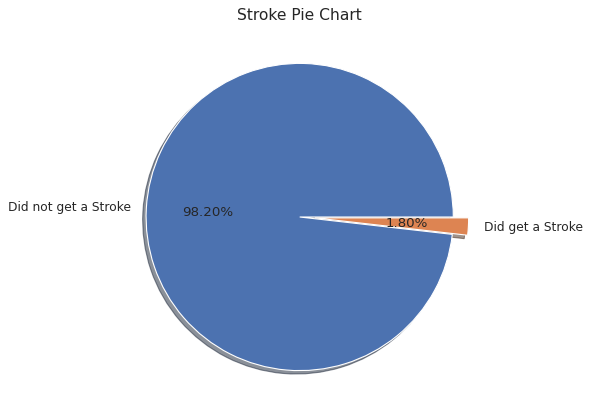

In [ ]:
sns.set(style="whitegrid")

labels = ["Did not get a Stroke", "Did get a Stroke"]
values = ds['stroke'].value_counts().tolist()

plt.pie(values, labels=labels, autopct="%1.2f%%", shadow=True, explode=[0, 0.1])
plt.title("Stroke Pie Chart", fontsize=14)
plt.show()


##Heat Map


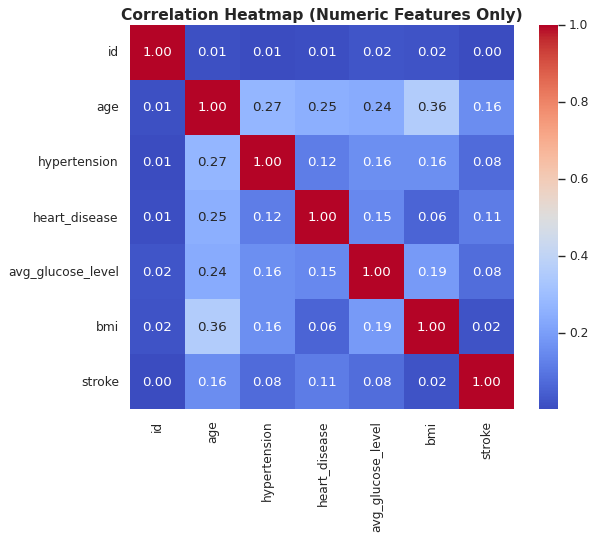

In [ ]:
num_df = ds.select_dtypes(include=['number'])

corr = num_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap (Numeric Features Only)", fontsize=14, weight='bold')
plt.show()

##Box Plot


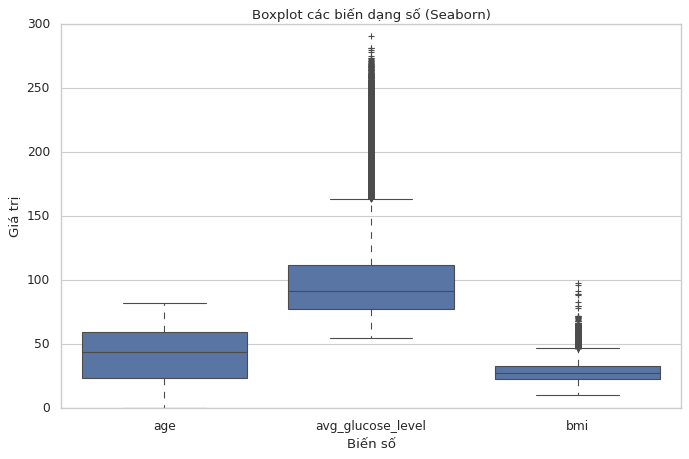

In [ ]:
numeric_cols = ["age", "avg_glucose_level", "bmi"]

df_long = ds[numeric_cols].melt(var_name="variable", value_name="value")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x="variable", y="value")
plt.title("Boxplot các biến dạng số (Seaborn)")
plt.xlabel("Biến số")
plt.ylabel("Giá trị")
plt.show()


## Bo ID

Đầu tiên, chúng ta có thể loại bỏ thông tin không cần thiết như 'id', vì đây chỉ là mã định danh của bệnh nhân và không cung cấp thông tin hữu ích nào trong trường hợp này. Nếu sử dụng sẽ dẫn tới OVF

In [313]:
ds.drop(['id'],axis=1, inplace=True)
ds.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## Bỏ Out Layer

In [314]:
numeric_cols = ["age", "avg_glucose_level", "bmi"]

for col in numeric_cols:
    Q1 = ds.loc[ds['stroke'] == 0, col].quantile(0.25)
    Q3 = ds.loc[ds['stroke'] == 0, col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    ds = ds[( (ds['stroke'] != 0) | ((ds[col] >= lower) & (ds[col] <= upper)) )]

ds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 36938 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             36938 non-null  object 
 1   age                36938 non-null  float64
 2   hypertension       36938 non-null  int64  
 3   heart_disease      36938 non-null  int64  
 4   ever_married       36938 non-null  object 
 5   work_type          36938 non-null  object 
 6   Residence_type     36938 non-null  object 
 7   avg_glucose_level  36938 non-null  float64
 8   bmi                36798 non-null  float64
 9   smoking_status     24895 non-null  object 
 10  stroke             36938 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.4+ MB


Giờ ta sẽ check xem Data có bị miss dữ liệu nào không

In [ ]:
ds.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,140
smoking_status,12043


#Chia train và test

In [315]:
from sklearn.model_selection import train_test_split

train_data1, test_data1 = train_test_split(
    ds,
    test_size=0.25,
    random_state=42,
    stratify=ds['stroke']
)

In [ ]:
display(test_data1.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
19736,Female,74.0,1,0,Yes,Govt_job,Urban,67.02,33.9,formerly smoked,0
9276,Female,21.0,0,0,No,Private,Urban,101.08,21.1,never smoked,0
4512,Female,59.0,0,0,Yes,Self-employed,Urban,88.10,30.7,never smoked,0
24228,Female,6.0,0,0,No,children,Urban,135.75,15.3,NaN,0
1282,Female,77.0,0,0,Yes,Private,Urban,79.30,26.4,NaN,0


## Replay

In [442]:
train_data = train_data1
test_data = test_data1

# Xử lý Miss BMI

Do dữ liệu ở cột BMI bị thiếu ít so với tất cả Data nên xóa các sample có giá trị nhãn 0 đi


In [443]:
# Loại bỏ missing BMI trong TRAIN
train_data = train_data1.drop(
    train_data1[(train_data1['bmi'].isna()) & (train_data1['stroke'] == 0)].index
)

# Loại bỏ missing BMI trong TEST
test_data = test_data1.drop(
    test_data1[(test_data1['bmi'].isna()) & (test_data1['stroke'] == 0)].index
)


In [444]:
from sklearn.neighbors import KernelDensity
import numpy as np

def kde_impute(series, bandwidth=1.0):
    """
    Điền missing bằng cách sinh mẫu từ KDE.
    """
    data = series.dropna()
    n_missing = series.isna().sum()

    if n_missing == 0:
        return series


    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
    kde.fit(data.values.reshape(-1,1))


    samples = kde.sample(n_missing).flatten()

    samples[samples < 0] = data.min()

    series_filled = series.copy()
    series_filled[series_filled.isna()] = samples

    return series_filled


In [445]:
train_data['bmi'] = kde_impute(train_data['bmi'], bandwidth=1.0)
test_data['bmi']  = kde_impute(test_data['bmi'], bandwidth=1.0)


In [ ]:
train_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
36240,Female,1.88,0,0,No,children,Urban,101.41,16.9,NaN,0
13214,Male,13.00,0,0,No,children,Rural,85.40,26.3,NaN,0
1648,Female,23.00,0,0,No,Private,Rural,92.26,17.1,NaN,0
7721,Female,35.00,0,0,Yes,Private,Rural,138.37,38.7,NaN,0
2351,Male,57.00,0,0,Yes,Private,Urban,90.40,26.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
34168,Female,19.00,0,0,No,Private,Urban,61.86,22.4,NaN,0
3212,Female,60.00,0,0,Yes,Govt_job,Urban,73.04,25.3,never smoked,0
23620,Female,15.00,0,0,No,children,Urban,78.96,19.9,NaN,0
13572,Female,33.00,0,0,Yes,Private,Rural,100.01,30.8,formerly smoked,0


In [ ]:
ds.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64
smoking_status,object


In [ ]:
ds.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,36938.000000,36938.000000,36938.000000,36938.000000,36798.000000,36938.000000
mean,40.014093,0.070442,0.034436,91.782080,27.535872,0.021198
std,22.468674,0.255895,0.182349,23.544911,6.676451,0.144045
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,22.000000,0.000000,0.000000,75.770000,22.800000,0.000000
50%,41.000000,0.000000,0.000000,88.280000,27.100000,0.000000
75%,57.000000,0.000000,0.000000,103.490000,31.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,56.600000,1.000000


Từ mô tả, chúng ta có thể xác định được phạm vi giá trị của các đặc trưng số, bao gồm: tuổi, chỉ số đường huyết trung bình và chỉ số khối cơ thể (BMI):

Tuổi: từ 0.08 đến 82 tuổi
Chỉ số đường huyết trung bình: từ 55 đến 291.05
BMI: từ 10.31 đến 97.6

# Unknown smoking status

Trong cột này giá trị bị thiếu rất nhiều nếu cứ để vậy thì có thể dẫn tới nhiễu dữ liệu

In [401]:
# TRAIN
missing_train = train_data[train_data['smoking_status'].isnull()]
count_train = missing_train['stroke'].value_counts()

print("Số lượng stroke trong TRAIN khi 'smoking_status' bị thiếu:")
print(count_train)
print("\n")

# TEST
missing_test = test_data[test_data['smoking_status'].isnull()]
count_test = missing_test['stroke'].value_counts()

print("Số lượng stroke trong TEST khi 'smoking_status' bị thiếu:")
print(count_test)


Số lượng stroke trong TRAIN khi 'smoking_status' bị thiếu:
stroke
0    8931
1     109
Name: count, dtype: int64


Số lượng stroke trong TEST khi 'smoking_status' bị thiếu:
stroke
0    2967
1      36
Name: count, dtype: int64


## Phương pháp 1

In [386]:
train_data = train_data.dropna(subset=['smoking_status']).copy()
test_data  = test_data.dropna(subset=['smoking_status']).copy()

## Phương pháp 2

In [446]:
import numpy as np

def process_smoking_status(df):
    df = df.copy()

    mask_missing = df['smoking_status'].isna()

    if mask_missing.sum() > 0:
        valid_values = df['smoking_status'].dropna().unique()
        df.loc[mask_missing, 'smoking_status'] = np.random.choice(
            valid_values,
            size=mask_missing.sum()
        )

    return df


In [447]:
train_data = process_smoking_status(train_data)
test_data  = process_smoking_status(test_data)


## Phương pháp 3

In [417]:
import numpy as np

def random_impute_smoking(df):
    df = df.copy()

    valid_values = df['smoking_status'].dropna().unique()

    mask_missing = df['smoking_status'].isna()

    if mask_missing.sum() > 0:
        df.loc[mask_missing, 'smoking_status'] = np.random.choice(
            valid_values,
            size=mask_missing.sum()
        )

    return df


In [418]:
train_data = random_impute_smoking(train_data)
test_data  = random_impute_smoking(test_data)

## Phương pháp 4

In [432]:
# TRAIN
mode_train = train_data['smoking_status'].mode()[0]
train_data['smoking_status'].fillna(mode_train, inplace=True)

# TEST
mode_test = test_data['smoking_status'].mode()[0]
test_data['smoking_status'].fillna(mode_test, inplace=True)


/tmp/ipython-input-2024551710.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['smoking_status'].fillna(mode_train, inplace=True)
/tmp/ipython-input-2024551710.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

#Procceing


## Gender classification

In [448]:
# TRAIN
print("Giá trị gender trong TRAIN:")
print(train_data['gender'].value_counts(normalize=False))
print("\n")

# TEST
print("Giá trị gender trong TEST:")
print(test_data['gender'].value_counts(normalize=False))


Giá trị gender trong TRAIN:
gender
Female    16612
Male      11085
Other         6
Name: count, dtype: int64


Giá trị gender trong TEST:
gender
Female    5462
Male      3772
Other        1
Name: count, dtype: int64


Chỉ có tỷ lệ nhỏ là giới tính khác nên ta có thể bỏ đi

In [449]:
# TRAIN
train_data = train_data[train_data['gender'] != 'Other'].copy()
print("Giá trị gender trong TRAIN sau khi loại 'Other':")
print(train_data['gender'].value_counts(normalize=False))
print("\n")

# TEST
test_data = test_data[test_data['gender'] != 'Other'].copy()
print("Giá trị gender trong TEST sau khi loại 'Other':")
print(test_data['gender'].value_counts(normalize=False))


Giá trị gender trong TRAIN sau khi loại 'Other':
gender
Female    16612
Male      11085
Name: count, dtype: int64


Giá trị gender trong TEST sau khi loại 'Other':
gender
Female    5462
Male      3772
Name: count, dtype: int64


## Work type assumption

In [388]:
# TRAIN
print("Giá trị work_type trong TRAIN:")
print(train_data['work_type'].value_counts(normalize=False))
print("\n")

# TEST
print("Giá trị work_type trong TEST:")
print(test_data['work_type'].value_counts(normalize=False))


Giá trị work_type trong TRAIN:
work_type
Private          12323
Self-employed     3159
Govt_job          2658
children           451
Never_worked        66
Name: count, dtype: int64


Giá trị work_type trong TEST:
work_type
Private          4083
Self-employed    1062
Govt_job          906
children          152
Never_worked       28
Name: count, dtype: int64


Do công việc children cũng là never_worked nên có thể chuyển thành Never_Worked

Work_type trong TRAIN sau khi thay 'children':
work_type
Private          15740
Never_worked      4605
Self-employed     3993
Govt_job          3359
Name: count, dtype: int64


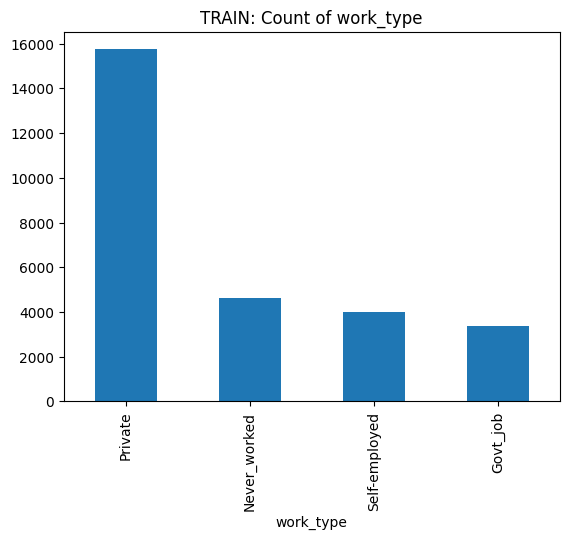

Work_type trong TEST sau khi thay 'children':
work_type
Private          5238
Never_worked     1511
Self-employed    1345
Govt_job         1140
Name: count, dtype: int64


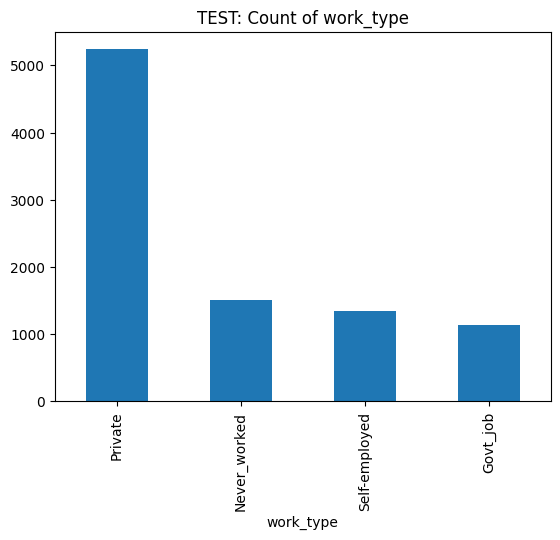

In [450]:
# --- TRAIN ---
train_data.loc[train_data['work_type'] == 'children', 'work_type'] = 'Never_worked'
print("Work_type trong TRAIN sau khi thay 'children':")
print(train_data['work_type'].value_counts())

train_data['work_type'].value_counts().plot(
    kind='bar',
    title='TRAIN: Count of work_type'
)
plt.show()

# --- TEST ---
test_data.loc[test_data['work_type'] == 'children', 'work_type'] = 'Never_worked'
print("Work_type trong TEST sau khi thay 'children':")
print(test_data['work_type'].value_counts())

test_data['work_type'].value_counts().plot(
    kind='bar',
    title='TEST: Count of work_type'
)
plt.show()


## MinMaxScaler


In [451]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['age', 'avg_glucose_level', 'bmi']

# --- TRAIN ---
scaler = MinMaxScaler()
train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])
print("Scaled TRAIN data:")
print(train_data[columns_to_scale].head())

# --- TEST ---

test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])
print("\nScaled TEST data:")
print(test_data[columns_to_scale].head())


Scaled TRAIN data:
            age  avg_glucose_level       bmi
7265   0.462891           0.381996  0.301075
6785   0.023438           0.172011  0.204301
14829  0.914551           0.189868  0.318280
28693  0.633789           0.106215  0.187097
24995  0.658203           0.057214  0.423656

Scaled TEST data:
            age  avg_glucose_level       bmi
26375  0.414062           0.243713  0.509677
32043  0.536133           0.107553  0.556989
25883  0.841309           0.121441  0.307527
6204   0.169922           0.006690  0.163441
40238  0.015137           0.187607  0.169892


## Onehot

In [452]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd


label_cols = ['gender', 'ever_married', 'Residence_type']

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])

    label_encoders[col] = le
    test_data[col] = le.transform(test_data[col])


# Train
train_data = pd.get_dummies(train_data, columns=['work_type', 'smoking_status'], drop_first=True)
# Test: dùng cùng các cột của train
test_data = pd.get_dummies(test_data, columns=['work_type', 'smoking_status'], drop_first=True)


missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

test_data = test_data[train_data.columns]

print(train_data[label_cols].head())


       gender  ever_married  Residence_type
7265        0             1               0
6785        1             0               0
14829       0             1               1
28693       0             1               0
24995       1             1               1


In [ ]:
test_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
19736,0,0.902344,1,0,1,1,0.055458,0.511828,0,False,False,False,False,False
9276,0,0.255371,0,0,0,1,0.212605,0.236559,0,False,True,False,True,False
4512,0,0.719238,0,0,1,1,0.152718,0.443011,0,False,False,True,True,False
24228,0,0.072266,0,0,0,1,0.372566,0.111828,0,True,False,False,True,False
1282,0,0.938965,0,0,1,1,0.112116,0.350538,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41743,0,0.633789,0,0,1,1,0.064547,0.313978,0,False,True,False,True,False
11749,1,0.816895,1,0,1,1,0.078481,0.505376,0,False,False,False,False,False
42371,1,0.279785,0,0,0,1,0.368091,0.331183,0,False,False,True,True,False
23624,0,0.060059,0,0,0,1,0.110409,0.176344,0,True,False,False,True,False


In [ ]:
train_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
36240,0,0.021973,0,0,0,1,0.214128,0.146237,0,True,False,False,True,False
13214,1,0.157715,0,0,0,0,0.140260,0.348387,0,True,False,False,True,False
1648,0,0.279785,0,0,0,0,0.171911,0.150538,0,False,True,False,True,False
7721,0,0.426270,0,0,1,0,0.384654,0.615054,0,False,True,False,True,False
2351,1,0.694824,0,0,1,1,0.163329,0.352688,0,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34168,0,0.230957,0,0,0,1,0.031651,0.264516,0,False,True,False,True,False
3212,0,0.731445,0,0,1,1,0.083233,0.326882,0,False,False,False,True,False
23620,0,0.182129,0,0,0,1,0.110547,0.210753,0,True,False,False,True,False
13572,0,0.401855,0,0,1,0,0.207668,0.445161,0,False,True,False,False,False


In [453]:
columns_to_convert = [
    'smoking_status_never smoked', 'smoking_status_smokes',
    'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed'
]

# TRAIN
train_data[columns_to_convert] = train_data[columns_to_convert].astype(int)

# TEST
test_data[columns_to_convert] = test_data[columns_to_convert].astype(int)


In [ ]:
train_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
36240,0,0.021973,0,0,0,1,0.214128,0.146237,0,1,0,0,1,0
13214,1,0.157715,0,0,0,0,0.140260,0.348387,0,1,0,0,1,0
1648,0,0.279785,0,0,0,0,0.171911,0.150538,0,0,1,0,1,0
7721,0,0.426270,0,0,1,0,0.384654,0.615054,0,0,1,0,1,0
2351,1,0.694824,0,0,1,1,0.163329,0.352688,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34168,0,0.230957,0,0,0,1,0.031651,0.264516,0,0,1,0,1,0
3212,0,0.731445,0,0,1,1,0.083233,0.326882,0,0,0,0,1,0
23620,0,0.182129,0,0,0,1,0.110547,0.210753,0,1,0,0,1,0
13572,0,0.401855,0,0,1,0,0.207668,0.445161,0,0,1,0,0,0


In [ ]:
test_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
19736,0,0.902344,1,0,1,1,0.055458,0.511828,0,0,0,0,0,0
9276,0,0.255371,0,0,0,1,0.212605,0.236559,0,0,1,0,1,0
4512,0,0.719238,0,0,1,1,0.152718,0.443011,0,0,0,1,1,0
24228,0,0.072266,0,0,0,1,0.372566,0.111828,0,1,0,0,1,0
1282,0,0.938965,0,0,1,1,0.112116,0.350538,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41743,0,0.633789,0,0,1,1,0.064547,0.313978,0,0,1,0,1,0
11749,1,0.816895,1,0,1,1,0.078481,0.505376,0,0,0,0,0,0
42371,1,0.279785,0,0,0,1,0.368091,0.331183,0,0,0,1,1,0
23624,0,0.060059,0,0,0,1,0.110409,0.176344,0,1,0,0,1,0


#Handel Sampling

In [ ]:
train_data.stroke.value_counts(normalize=False)

,count
stroke,
0,27110
1,587


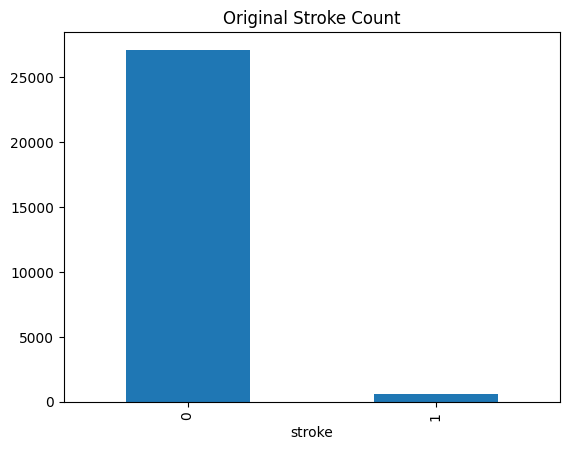

In [ ]:
train_data.stroke.value_counts().plot(kind='bar', title='Original Stroke Count');

Bộ dữ liệu bị Imbalanced nặng, giá trị mà người bệnh bị đột quỵ chỉ chiếm gần 1.8% toàn bệnh nhân

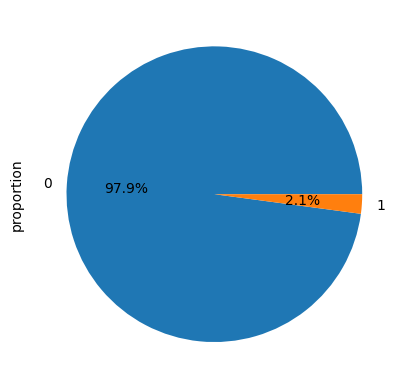

In [ ]:
train_data.stroke.value_counts(normalize=True).plot.pie(autopct="%.1f%%");

## Hàm Modul

### SVM

In [258]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_svm(X_train, y_train, X_test, y_test, random_state=42, scale='0-1'):
    svm = SVC(
        kernel='rbf',
        C=10,
        gamma=0.01,
        class_weight='balanced',
        random_state=random_state
    )

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    svm_acc = accuracy_score(y_test, y_pred)
    svm_recall = recall_score(y_test, y_pred, pos_label=1)

    if scale == '0-1':
        print(f"Accuracy: {svm_acc:.4f}")
        print(f"Recall:   {svm_recall:.4f}")
    elif scale == '0-100':
        print(f"Accuracy: {svm_acc*100:.2f}%")
        print(f"Recall:   {svm_recall*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    return svm


### Logistic Regression

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_logistic_regression(X_train, y_train, X_test, y_test, random_state=42, scale='0-1'):
    lr = LogisticRegression(
        C=1,
        penalty='l2',
        solver='liblinear',
        class_weight='balanced',
        random_state=random_state,
        max_iter=200
    )

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    lr_acc = accuracy_score(y_test, y_pred)
    lr_recall = recall_score(y_test, y_pred, pos_label=1)

    if scale == '0-1':
        print(f"Accuracy: {lr_acc:.4f}")
        print(f"Recall:   {lr_recall:.4f}")
    else:
        print(f"Accuracy: {lr_acc*100:.2f}%")
        print(f"Recall:   {lr_recall*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    return lr


### Random Forest

In [260]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report

def train_random_forest(X_train, y_train, X_test, y_test, random_state=42, scale='0-1'):
    rf = RandomForestClassifier(
        n_estimators=300,
        max_depth=20,
        min_samples_split=2,
        min_samples_leaf=4,
        max_features='sqrt',
        class_weight='balanced_subsample',
        random_state=random_state,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    rf_acc = accuracy_score(y_test, y_pred)
    rf_recall = recall_score(y_test, y_pred, pos_label=1)

    if scale == '0-1':
        print(f"Accuracy: {rf_acc:.4f}")
        print(f"Recall:   {rf_recall:.4f}")
    else:
        print(f"Accuracy: {rf_acc*100:.2f}%")
        print(f"Recall:   {rf_recall*100:.2f}%")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    return rf


# PP1

## Random under-sampling

In [ ]:
count_class_0, count_class_1 = train_data.stroke.value_counts()

ds_class_0 = train_data[train_data['stroke'] == 0]
ds_class_1 = train_data[train_data['stroke'] == 1]

Random under-sampling:
stroke
0    587
1    587
Name: count, dtype: int64


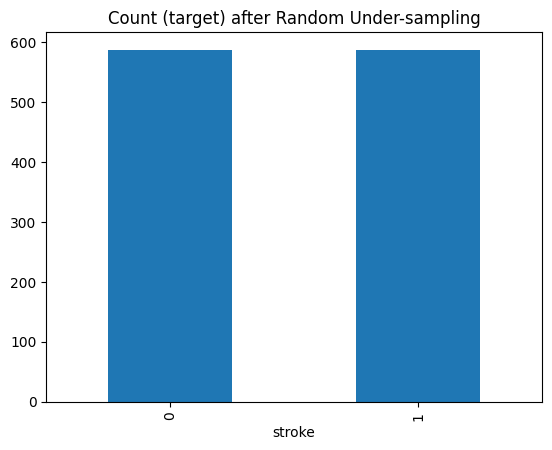

In [ ]:
ds_class_0_under = ds_class_0.sample(n=count_class_1, random_state=42)

train_under = pd.concat([ds_class_0_under, ds_class_1], axis=0)

print('Random under-sampling:')
print(train_under.stroke.value_counts())

train_under.stroke.value_counts().plot(
    kind='bar',
    title='Count (target) after Random Under-sampling'
)
plt.show()

In [ ]:
train_under

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_never smoked,smoking_status_smokes
17772,1,0.609375,0,0,1,1,0.237935,0.464516,0,0,1,0,0,0
21148,0,0.267578,0,0,0,1,0.092507,0.380645,0,0,1,0,0,0
25088,1,0.621582,0,0,1,1,0.134170,0.350538,0,0,0,1,0,0
3163,1,0.987793,0,1,0,0,0.186814,0.415054,0,0,0,1,1,0
27237,0,0.621582,0,0,1,1,0.076866,0.286022,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32264,1,0.768066,1,0,1,1,0.550337,0.307527,1,0,0,0,0,0
25208,0,0.816895,1,1,1,0,0.785688,0.587097,1,0,1,0,1,0
18559,0,0.707031,0,0,0,0,0.097352,0.563441,1,0,0,1,1,0
8767,0,0.951172,0,0,1,1,0.056704,0.311828,1,0,1,0,1,0


In [ ]:
X_train = train_under.drop('stroke', axis=1)
y_train = train_under['stroke']
X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

## Random Over-sampling

SMOTE Over-Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_smote = train_data.drop(columns=['stroke'])
y_smote = train_data['stroke']

Phân phối nhãn sau SMOTE:
stroke
0    27110
1    27110
Name: count, dtype: int64


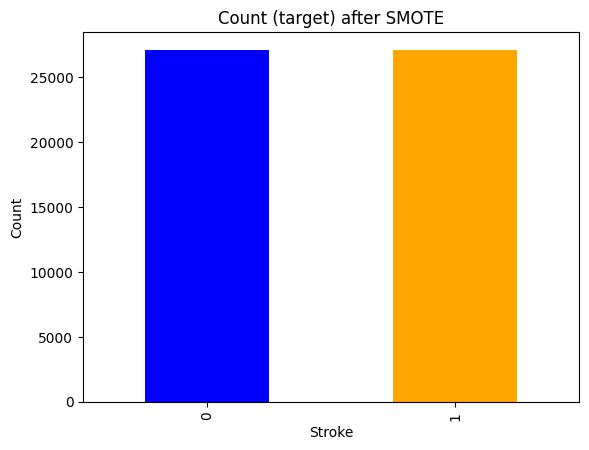

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_sm, y_sm = smote.fit_resample(X_smote, y_smote)

print("Phân phối nhãn sau SMOTE:")
print(y_sm.value_counts())

y_sm.value_counts().plot(
    kind='bar',
    title='Count (target) after SMOTE',
    color=['blue', 'orange']
)
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

In [ ]:
X_trainsm = X_sm
y_trainsm = y_sm

## Phương pháp 1

### SVM

In [ ]:
# --- Train SVM với under-sampling ---
svm_under = train_svm(X_train, y_train, X_test, y_test, scale='0-1')


Accuracy: 0.7631
Recall:   0.8726

Classification Report:
              precision    recall  f1-score   support

           0     0.9957    0.7603    0.8622      6133
           1     0.0853    0.8726    0.1553       157

    accuracy                         0.7631      6290
   macro avg     0.5405    0.8165    0.5088      6290
weighted avg     0.9730    0.7631    0.8446      6290



In [ ]:
# --- Train SVM với SMOTE (over-sampling) ---
svm_smote = train_svm(X_trainsm,y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7695
Recall:   0.8408

Classification Report:
              precision    recall  f1-score   support

           0     0.9947    0.7677    0.8666      6133
           1     0.0848    0.8408    0.1540       157

    accuracy                         0.7695      6290
   macro avg     0.5397    0.8042    0.5103      6290
weighted avg     0.9720    0.7695    0.8488      6290



### Logistic Regression

In [ ]:
lr_under = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7782
Recall:   0.8599

Classification Report:
              precision    recall  f1-score   support

           0     0.9954    0.7761    0.8722      6133
           1     0.0895    0.8599    0.1622       157

    accuracy                         0.7782      6290
   macro avg     0.5425    0.8180    0.5172      6290
weighted avg     0.9728    0.7782    0.8545      6290



In [ ]:
lr_smote = train_logistic_regression(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7790
Recall:   0.8408

Classification Report:
              precision    recall  f1-score   support

           0     0.9948    0.7774    0.8728      6133
           1     0.0882    0.8408    0.1596       157

    accuracy                         0.7790      6290
   macro avg     0.5415    0.8091    0.5162      6290
weighted avg     0.9722    0.7790    0.8550      6290



###Random Forest

In [ ]:
rf_under = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7881
Recall:   0.8662

Classification Report:
              precision    recall  f1-score   support

           0     0.9957    0.7861    0.8785      6133
           1     0.0939    0.8662    0.1695       157

    accuracy                         0.7881      6290
   macro avg     0.5448    0.8262    0.5240      6290
weighted avg     0.9732    0.7881    0.8608      6290



In [ ]:
rf_smote = train_random_forest(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.9062
Recall:   0.6051

Classification Report:
              precision    recall  f1-score   support

           0     0.9891    0.9139    0.9500      6133
           1     0.1525    0.6051    0.2436       157

    accuracy                         0.9062      6290
   macro avg     0.5708    0.7595    0.5968      6290
weighted avg     0.9682    0.9062    0.9324      6290



## Phương pháp 2

###SVM

In [ ]:
svm_under1 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7682
Recall:   0.9031

Classification Report:
              precision    recall  f1-score   support

           0     0.9973    0.7653    0.8660      9038
           1     0.0770    0.9031    0.1419       196

    accuracy                         0.7682      9234
   macro avg     0.5371    0.8342    0.5040      9234
weighted avg     0.9777    0.7682    0.8507      9234



In [ ]:
from joblib import dump, load

# Huấn luyện mô hình
svm_under1 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

# Lưu mô hình ra file
dump(svm_under1, "svm_under1.joblib")
print("Mô hình SVM đã được lưu vào svm_under1.joblib")


Accuracy: 0.7682
Recall:   0.9031

Classification Report:
              precision    recall  f1-score   support

           0     0.9973    0.7653    0.8660      9038
           1     0.0770    0.9031    0.1419       196

    accuracy                         0.7682      9234
   macro avg     0.5371    0.8342    0.5040      9234
weighted avg     0.9777    0.7682    0.8507      9234

Mô hình SVM đã được lưu vào svm_under1.joblib


In [ ]:
svm_smote = train_svm(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7754
Recall:   0.8724

Classification Report:
              precision    recall  f1-score   support

           0     0.9964    0.7733    0.8708      9038
           1     0.0770    0.8724    0.1416       196

    accuracy                         0.7754      9234
   macro avg     0.5367    0.8229    0.5062      9234
weighted avg     0.9769    0.7754    0.8553      9234



### Logistic Regression

In [ ]:
lr_under = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7869
Recall:   0.8724

Classification Report:
              precision    recall  f1-score   support

           0     0.9965    0.7850    0.8782      9038
           1     0.0809    0.8724    0.1481       196

    accuracy                         0.7869      9234
   macro avg     0.5387    0.8287    0.5131      9234
weighted avg     0.9771    0.7869    0.8627      9234



In [ ]:
lr_smote = train_logistic_regression(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7825
Recall:   0.8776

Classification Report:
              precision    recall  f1-score   support

           0     0.9966    0.7805    0.8754      9038
           1     0.0798    0.8776    0.1463       196

    accuracy                         0.7825      9234
   macro avg     0.5382    0.8290    0.5108      9234
weighted avg     0.9771    0.7825    0.8599      9234



### Random Forest

In [ ]:
rf_under = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7953
Recall:   0.8929

Classification Report:
              precision    recall  f1-score   support

           0     0.9971    0.7932    0.8835      9038
           1     0.0856    0.8929    0.1562       196

    accuracy                         0.7953      9234
   macro avg     0.5413    0.8430    0.5199      9234
weighted avg     0.9777    0.7953    0.8681      9234



In [ ]:
rf_smote = train_random_forest(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.8885
Recall:   0.6327

Classification Report:
              precision    recall  f1-score   support

           0     0.9912    0.8940    0.9401      9038
           1     0.1146    0.6327    0.1941       196

    accuracy                         0.8885      9234
   macro avg     0.5529    0.7633    0.5671      9234
weighted avg     0.9726    0.8885    0.9242      9234



## Phương pháp 3

###SVM

In [ ]:
svm_under = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7648
Recall:   0.9031

Classification Report:
              precision    recall  f1-score   support

           0     0.9972    0.7618    0.8638      9038
           1     0.0760    0.9031    0.1401       196

    accuracy                         0.7648      9234
   macro avg     0.5366    0.8324    0.5019      9234
weighted avg     0.9777    0.7648    0.8484      9234



In [ ]:
from joblib import dump, load

# Huấn luyện mô hình
svm_under3 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

# Lưu mô hình ra file
dump(svm_under1, "svm_under3.joblib")
print("Mô hình SVM đã được lưu vào svm_under3.joblib")


Accuracy: 0.7648
Recall:   0.9031

Classification Report:
              precision    recall  f1-score   support

           0     0.9972    0.7618    0.8638      9038
           1     0.0760    0.9031    0.1401       196

    accuracy                         0.7648      9234
   macro avg     0.5366    0.8324    0.5019      9234
weighted avg     0.9777    0.7648    0.8484      9234

Mô hình SVM đã được lưu vào svm_under3.joblib


In [ ]:
svm_smote = train_svm(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7847
Recall:   0.8673

Classification Report:
              precision    recall  f1-score   support

           0     0.9963    0.7829    0.8768      9038
           1     0.0797    0.8673    0.1460       196

    accuracy                         0.7847      9234
   macro avg     0.5380    0.8251    0.5114      9234
weighted avg     0.9769    0.7847    0.8613      9234



###Logistic Regression

In [ ]:
lr_under = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7862
Recall:   0.8827

Classification Report:
              precision    recall  f1-score   support

           0     0.9968    0.7841    0.8778      9038
           1     0.0815    0.8827    0.1491       196

    accuracy                         0.7862      9234
   macro avg     0.5391    0.8334    0.5134      9234
weighted avg     0.9773    0.7862    0.8623      9234



In [ ]:
lr_smote = train_logistic_regression(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7907
Recall:   0.8724

Classification Report:
              precision    recall  f1-score   support

           0     0.9965    0.7889    0.8806      9038
           1     0.0823    0.8724    0.1503       196

    accuracy                         0.7907      9234
   macro avg     0.5394    0.8307    0.5155      9234
weighted avg     0.9771    0.7907    0.8651      9234



###Random Forest

In [ ]:
rf_under = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7856
Recall:   0.8929

Classification Report:
              precision    recall  f1-score   support

           0     0.9970    0.7832    0.8773      9038
           1     0.0820    0.8929    0.1502       196

    accuracy                         0.7856      9234
   macro avg     0.5395    0.8381    0.5138      9234
weighted avg     0.9776    0.7856    0.8619      9234



In [ ]:
rf_smote = train_random_forest(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.9064
Recall:   0.5816

Classification Report:
              precision    recall  f1-score   support

           0     0.9902    0.9135    0.9503      9038
           1     0.1272    0.5816    0.2088       196

    accuracy                         0.9064      9234
   macro avg     0.5587    0.7476    0.5795      9234
weighted avg     0.9718    0.9064    0.9345      9234



## Phương pháp 4

###SVM

In [ ]:
svm_under = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7685
Recall:   0.8980

Classification Report:
              precision    recall  f1-score   support

           0     0.9971    0.7657    0.8662      9038
           1     0.0767    0.8980    0.1414       196

    accuracy                         0.7685      9234
   macro avg     0.5369    0.8318    0.5038      9234
weighted avg     0.9776    0.7685    0.8508      9234



In [ ]:
svm_smote = train_svm(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7878
Recall:   0.8622

Classification Report:
              precision    recall  f1-score   support

           0     0.9962    0.7862    0.8789      9038
           1     0.0804    0.8622    0.1471       196

    accuracy                         0.7878      9234
   macro avg     0.5383    0.8242    0.5130      9234
weighted avg     0.9768    0.7878    0.8633      9234



###Logistic Regression

In [ ]:
lr_under = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7884
Recall:   0.8827

Classification Report:
              precision    recall  f1-score   support

           0     0.9968    0.7863    0.8791      9038
           1     0.0822    0.8827    0.1504       196

    accuracy                         0.7884      9234
   macro avg     0.5395    0.8345    0.5148      9234
weighted avg     0.9774    0.7884    0.8637      9234



In [ ]:
lr_smote = train_logistic_regression(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.7911
Recall:   0.8622

Classification Report:
              precision    recall  f1-score   support

           0     0.9962    0.7896    0.8809      9038
           1     0.0816    0.8622    0.1491       196

    accuracy                         0.7911      9234
   macro avg     0.5389    0.8259    0.5150      9234
weighted avg     0.9768    0.7911    0.8654      9234



###Random Forest

In [ ]:
rf_under = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7958
Recall:   0.8724

Classification Report:
              precision    recall  f1-score   support

           0     0.9965    0.7941    0.8839      9038
           1     0.0842    0.8724    0.1535       196

    accuracy                         0.7958      9234
   macro avg     0.5403    0.8333    0.5187      9234
weighted avg     0.9772    0.7958    0.8684      9234



In [ ]:
rf_smote = train_random_forest(X_trainsm, y_trainsm, X_test, y_test, scale='0-1')

Accuracy: 0.9105
Recall:   0.5918

Classification Report:
              precision    recall  f1-score   support

           0     0.9904    0.9175    0.9526      9038
           1     0.1346    0.5918    0.2193       196

    accuracy                         0.9105      9234
   macro avg     0.5625    0.7546    0.5859      9234
weighted avg     0.9723    0.9105    0.9370      9234



# Kết hợp

In [454]:
X0 = train_data.drop('stroke', axis=1)
y0 = train_data['stroke']

print("Ban đầu:")
print(y0.value_counts())

Ban đầu:
stroke
0    27110
1      587
Name: count, dtype: int64


In [455]:
count_1 = y0.value_counts()[1]
target = count_1 * 2

sm = SMOTE(sampling_strategy={1: target}, random_state=42)
X_over, y_over = sm.fit_resample(X0, y0)

df_over = pd.DataFrame(X_over, columns=X0.columns)
df_over['stroke'] = y_over

print("Sau SMOTE:")
print(df_over.stroke.value_counts())


Sau SMOTE:
stroke
0    27110
1     1174
Name: count, dtype: int64


In [456]:
n_minority = df_over.stroke.value_counts()[1]

ds1 = df_over[df_over.stroke == 1]
ds0 = df_over[df_over.stroke == 0].sample(n=n_minority, random_state=42)

train_final = pd.concat([ds1, ds0], axis=0).sample(frac=1, random_state=42)

print("Sau OVER + UNDER:")
print(train_final.stroke.value_counts())


Sau OVER + UNDER:
stroke
0    1174
1    1174
Name: count, dtype: int64


In [457]:
X_train = train_final.drop('stroke', axis=1)
y_train = train_final['stroke']

X_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']


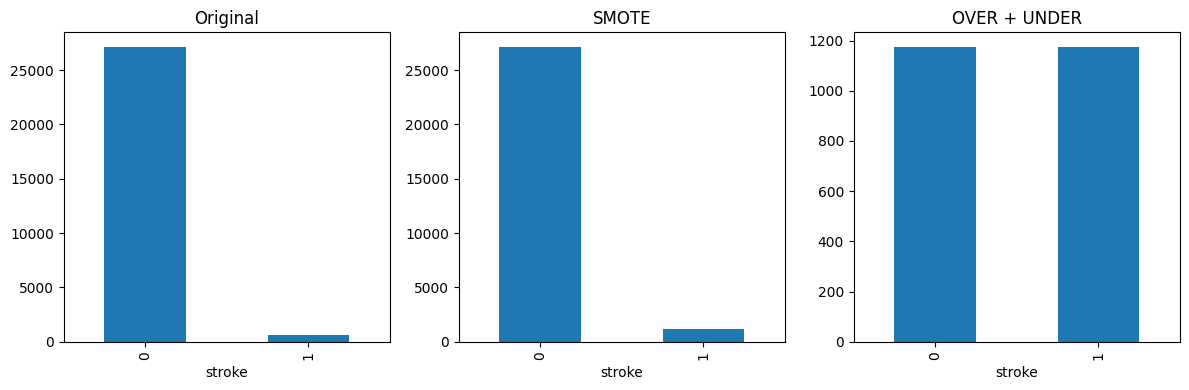

In [458]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

train_data.stroke.value_counts().plot(kind='bar', ax=axes[0], title='Original')
df_over.stroke.value_counts().plot(kind='bar', ax=axes[1], title='SMOTE')
train_final.stroke.value_counts().plot(kind='bar', ax=axes[2], title='OVER + UNDER')

plt.tight_layout()
plt.show()


## Phương pháp 1

### SVM

In [394]:
svm_1 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7761
Recall:   0.8125

Classification Report:
              precision    recall  f1-score   support

           0     0.9937    0.7752    0.8709      6071
           1     0.0870    0.8125    0.1571       160

    accuracy                         0.7761      6231
   macro avg     0.5403    0.7938    0.5140      6231
weighted avg     0.9704    0.7761    0.8526      6231



### Logistic Regression

In [395]:
lr_1 = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7870
Recall:   0.8000

Classification Report:
              precision    recall  f1-score   support

           0     0.9933    0.7867    0.8780      6071
           1     0.0900    0.8000    0.1617       160

    accuracy                         0.7870      6231
   macro avg     0.5416    0.7933    0.5199      6231
weighted avg     0.9701    0.7870    0.8596      6231



### Random Forest

In [396]:
rf_2 = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8164
Recall:   0.7875

Classification Report:
              precision    recall  f1-score   support

           0     0.9932    0.8172    0.8966      6071
           1     0.1019    0.7875    0.1805       160

    accuracy                         0.8164      6231
   macro avg     0.5476    0.8023    0.5386      6231
weighted avg     0.9703    0.8164    0.8782      6231



## Phương Pháp 2

### SVM

In [410]:
svm_2 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7967
Recall:   0.8214

Classification Report:
              precision    recall  f1-score   support

           0     0.9952    0.7962    0.8846      9038
           1     0.0804    0.8214    0.1464       196

    accuracy                         0.7967      9234
   macro avg     0.5378    0.8088    0.5155      9234
weighted avg     0.9757    0.7967    0.8690      9234



### Logistic Regression

In [411]:
lr_2 = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8086
Recall:   0.8265

Classification Report:
              precision    recall  f1-score   support

           0     0.9954    0.8083    0.8921      9038
           1     0.0855    0.8265    0.1549       196

    accuracy                         0.8086      9234
   macro avg     0.5404    0.8174    0.5235      9234
weighted avg     0.9761    0.8086    0.8765      9234



### Random Forest

In [412]:
rf_2 = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8282
Recall:   0.8061

Classification Report:
              precision    recall  f1-score   support

           0     0.9950    0.8287    0.9043      9038
           1     0.0926    0.8061    0.1661       196

    accuracy                         0.8282      9234
   macro avg     0.5438    0.8174    0.5352      9234
weighted avg     0.9758    0.8282    0.8886      9234



## Phương pháp 3

### SVM

In [425]:
svm_3 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7948
Recall:   0.8163

Classification Report:
              precision    recall  f1-score   support

           0     0.9950    0.7943    0.8834      9038
           1     0.0792    0.8163    0.1445       196

    accuracy                         0.7948      9234
   macro avg     0.5371    0.8053    0.5139      9234
weighted avg     0.9756    0.7948    0.8677      9234



### Logistic Regression

In [426]:
lr_3 = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8078
Recall:   0.8367

Classification Report:
              precision    recall  f1-score   support

           0     0.9956    0.8071    0.8915      9038
           1     0.0860    0.8367    0.1560       196

    accuracy                         0.8078      9234
   macro avg     0.5408    0.8219    0.5238      9234
weighted avg     0.9763    0.8078    0.8759      9234



### Random Forest

In [427]:
rf_3 = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8250
Recall:   0.8163

Classification Report:
              precision    recall  f1-score   support

           0     0.9952    0.8252    0.9023      9038
           1     0.0920    0.8163    0.1653       196

    accuracy                         0.8250      9234
   macro avg     0.5436    0.8208    0.5338      9234
weighted avg     0.9760    0.8250    0.8866      9234



## Phương pháp 4

### SVM

In [439]:
svm_4 = train_svm(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.7950
Recall:   0.8316

Classification Report:
              precision    recall  f1-score   support

           0     0.9954    0.7942    0.8835      9038
           1     0.0806    0.8316    0.1469       196

    accuracy                         0.7950      9234
   macro avg     0.5380    0.8129    0.5152      9234
weighted avg     0.9760    0.7950    0.8679      9234



### Logistic Regression

In [440]:
lr_4 = train_logistic_regression(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8088
Recall:   0.8367

Classification Report:
              precision    recall  f1-score   support

           0     0.9956    0.8081    0.8921      9038
           1     0.0864    0.8367    0.1566       196

    accuracy                         0.8088      9234
   macro avg     0.5410    0.8224    0.5244      9234
weighted avg     0.9763    0.8088    0.8765      9234



### Random Forest

In [441]:
rf_4 = train_random_forest(X_train, y_train, X_test, y_test, scale='0-1')

Accuracy: 0.8238
Recall:   0.8061

Classification Report:
              precision    recall  f1-score   support

           0     0.9949    0.8242    0.9015      9038
           1     0.0904    0.8061    0.1626       196

    accuracy                         0.8238      9234
   macro avg     0.5427    0.8152    0.5321      9234
weighted avg     0.9757    0.8238    0.8859      9234

